<a href="https://colab.research.google.com/github/ursulacotrina/Proyectos/blob/main/data_analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Acceso a un repositorio privado

!wget -q https://raw.githubusercontent.com/tsunrise/colab-github/main/colab_github.py
import colab_github
colab_github.github_auth(persistent_key=False)

Looks that a private key is already created. If you have already push it to github, no action required.
 Otherwise, Please go to https://github.com/settings/ssh/new to upload the following key: 
ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIBDRjTkUu/KcbWsRKvoIVN+e+HymKImPrsPjz5c98O5p root@b7a61efb2b52

Please use SSH method to clone repo.


In [ ]:
your_private_repo = "ursulacotrina/Project01" #@param {"type": "string"}

addr = f"git@github.com:{your_private_repo}.git"
!git clone $addr

Cloning into 'Project01'...


# 01 instalar librerias

In [ ]:
!pip install --upgrade -q pygsheets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 3.3 MB/s eta 0:00:00


In [ ]:
!pip install Levenshtein


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 32.0 MB/s eta 0:00:00


In [ ]:
#import sys
#sys.executable

In [ ]:
import warnings
import datetime
from datetime import datetime
import time

import pandas as pd
import google.auth
from google.colab import auth
auth.authenticate_user()
import pygsheets
credentials, _ = google.auth.default()
gc = pygsheets.client.Client(credentials)

In [ ]:
import numpy as np

In [ ]:
import Levenshtein  as lv
from itertools import combinations, permutations

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# 02 funciones

In [ ]:
def open_gsheets(link, sheet_index):
  sh1 = gc.open_by_url(link)
  wks = sh1[sheet_index]
  data_get = pd.DataFrame(wks.get_all_records()) #get values with out colnames (with colnames drop some columns)
  return data_get

In [ ]:
def combinations_string(phrases):
  p = phrases.split()
  return [" ".join(a) for a in permutations(p, len(p))]

In [ ]:
def match_phrases_target(list_1, list_2, nn):
  '''
  match_phrases_target

  Compare all word combinations of phrases versus a string target by Levenshtein algorithm, result is data frame with 
  list of phrases, list of NN firsts string target more likely to match list of phrases, combination winner and ratio of match
  calculated by Levenshtein 
  '''
  r  =pd.DataFrame(columns=['index', 'list_1_phrases', 'list_2_ccpp', 'combination', 'ratio'])
  nn = nn
  for i in list_1:
    #print('frase: ',i)
    k = []
    for l in list_2:
      w=[[],[]]
      for j in combinations_string(i):
        aa = lv.ratio(j, l)
        w[0].append(j)
        w[1].append(aa)
        #print('ccpp: '+l, 'combinación: '+j, aa)
      a_max = max(w[1])
      a_max_arg = w[0][w[1].index(max(w[1]))]
      k.append([i, l, a_max_arg,a_max])
    #print(k)
    dd = pd.DataFrame(k, columns=['list_1_phrases', 'list_2_ccpp', 'combination', 'ratio']).sort_values(
      by=['list_1_phrases','ratio'], ascending=False).reset_index()[0:nn]
    r = r.append(dd, ignore_index=True)
  return r

# 03 limpieza de datos

## 03 01 importar datos

In [ ]:
link = 'https://docs.google.com/spreadsheets/d/1BAbFMVPSNuHdj5MaUZqLXgLYN8XA27ERrRbvovVrEHY/edit?usp=drive_web&ouid=117333138354521315740'

### 03 01_01 Importar hoja "datoscongreso"

In [ ]:
sheet_index = 0
datoscongreso = open_gsheets(link, sheet_index)
datoscongreso.head(4)

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Proponente\nCongreso,Sumilla\nPROPONE REFORMA CONSTITUCIONAL DEL AR...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,"Luna Gálvez, José León","Coautores\nWong Pujada, Enrique\nAnderson Ramí...",Adherentes\n- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/J...,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal...
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Proponente\nCongreso,Sumilla\nPROPONE DECLARAR DE NECESIDAD PÚBLICA...,LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPER...,"Córdova Lobatón, María Jessica","Coautores\nCueto Aservi, José Ernesto\nCiccia ...",Adherentes\n- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperat...",Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/M...,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal...
2,PROYECTO DE LEY N° 00005/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Proponente\nCongreso,"Sumilla\nPROPONE MODIFICAR EL ARTÍCULO 8, NUME...","LEY QUE MODIFICA LA LEY 29158, LEY ORGÁNICA DE...","Bazán Calderón, Diego Alonso Fernando","Coautores\nCueto Aservi, José Ernesto\nYarrow ...",Adherentes\n- -,Renovación Popular,"Descentralización, Regionalización, Gobiernos ...",Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/D...,02/05/2023 17:32:35,https://wb2server.congreso.gob.pe/spley-portal...
3,PROYECTO DE LEY N° 00006/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Proponente\nCongreso,Sumilla\nPROPONE INTERPRETAR EL USO DE LA CUES...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,"Aragón Carreño, Luis Ángel","Coautores\nSoto Palacios, Wilson\nDoroteo Carb...",Adherentes\n- -,Acción Popular,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/L...,02/05/2023 17:32:38,https://wb2server.congreso.gob.pe/spley-portal...


### 03 01_02 Importar hoja "datoscongresoseguimiento"

In [ ]:
sheet_index = 1
datoscongresoseguimiento = open_gsheets(link, sheet_index)
datoscongresoseguimiento.head(4)

,FECHA,ESTADO PROCESAL,COMISIÓN,DETALLE,ADJUNTOS,enlace
0,Fecha28/12/2022,EstadoDictamen,ComisiónJusticia y Derechos Humanos,DetallePOR UNANIMIDAD - NO APROBACIÓN Y SU ENV...,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
1,Fecha20/08/2021,EstadoEN COMISIÓN,ComisiónJusticia y Derechos Humanos,NaN,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
2,Fecha03/08/2021,EstadoPRESENTADO,NaN,DetalleLEY QUE MODIFICA EL ARTÍCULO 108-C DEL ...,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
3,Fecha28/12/2022,EstadoDictamen,ComisiónJusticia y Derechos Humanos,DetallePOR UNANIMIDAD - NO APROBACIÓN Y SU ENV...,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...


### 03 01_03 Importar hoja "datoscongresistas"

In [ ]:
sheet_index = 2
datoscongresistas = open_gsheets(link, sheet_index)
datoscongresistas.head(4)

,nombre,votacion,inicio,fin,grupopartido,bancada,representa,condicion,estadoscrap,fecha,enlace
0,,109702,27-jul-2011,26-jul-2016,Gana Perú,ACCIÓN POPULAR - FRENTE AMPLIO,LIMA,Fallecido,yes,02/05/2023 3:01:13,1
1,WALTER ACHA ROMANÍ,15087,27-jul-2011,26-jul-2016,Gana Perú,NO AGRUPADOS,Ayacucho,en Ejercicio,yes,02/05/2023 3:01:18,2
2,RICHARD FRANK ACUÑA NÚÑEZ,74789,27-jul-2011,26-jul-2016,Alianza por el Gran Cambio,PPC - APP,La libertad,en Ejercicio,yes,02/05/2023 3:01:21,3
3,VIRGILIO ACUÑA PERALTA,26058,27-jul-2011,26-jul-2016,Alianza Solidaridad Nacional,SOLIDARIDAD NACIONAL,Lambayeque,en Ejercicio,yes,02/05/2023 3:01:24,4


### 03 01_04 Importar Matriz seguimiento coordinación parlamentaria

In [ ]:
mat = 'https://docs.google.com/spreadsheets/d/1X8-qlFkkR6CIKbx3_V7m-Ela0cfsjUuTUjfAwgoXxto/edit#gid=2082768581' 
#copia generada en google sheet, se corrigieron NUMERO 1221/21 y 503/20211

In [ ]:
sheet_index = 0
matrix = open_gsheets(mat, sheet_index)
matrix.head(4)

,FECHA,NUMERO,PROYECTO / DESCRIPCIÓN,PROPONENTE,BANCADA,ALERTA,COMISIÓN,ESTADO,COMENTARIOS,BANCADAS A FAVOR,BANCADAS EN CONTRA,BANCADAS EN ABSTENCIÓN,IMPACTO,JUSTIFICACIÓN DEL IMPACTO,AMBIENTE FAVORABLE,GRADO POPULISTA,PROBABILIDAD,OPINION GREMIAL
0,11/5/2023,4975/2023,Ley que habilita a las billeteras digitales pa...,Silvia Monteza Facho,Acción Popular,,,,,,,,,,,,,
1,10/5/2023,4939/2023,Ley que modifica código de consumidor e incorp...,Norma Yarrow,Avanza País,,,,,,,,,,,,,
2,11/4/2023,4704/2023,Reprogramación de deudas de personas naturales...,Vivian Olivos Martinez,Fuerza Popular,rojo,,,,,,,,,,,,
3,10/4/2023,4682/2023,Ley que dispone la incorporación de la educaci...,Flavio Cruz Mamani,Peru Libre,verde,,,,,,,Riesgo no material (1),,,3,,


In [ ]:
matrix['key_proy'] = [x.zfill(10) for x in matrix['NUMERO']]
matrix[['key_proy', 'NUMERO']]

,key_proy,NUMERO
0,04975/2023,4975/2023
1,04939/2023,4939/2023
2,04704/2023,4704/2023
3,04682/2023,4682/2023
4,04525/2022,4525/2022
...,...,...
65,00503/2021,503/2021
66,00457/2021,457/2021
67,415/2021\n\n398/2021\n,415/2021\n\n398/2021\n
68,00158/2021,158/2021


In [ ]:
matrix_pf = matrix.add_prefix('matrix ')

In [ ]:
matrix_pf.columns

Index(['matrix FECHA', 'matrix NUMERO', 'matrix PROYECTO / DESCRIPCIÓN',
       'matrix PROPONENTE', 'matrix BANCADA', 'matrix ALERTA',
       'matrix COMISIÓN', 'matrix ESTADO', 'matrix COMENTARIOS',
       'matrix BANCADAS A FAVOR ', 'matrix BANCADAS EN CONTRA ',
       'matrix BANCADAS EN ABSTENCIÓN', 'matrix IMPACTO',
       'matrix JUSTIFICACIÓN DEL IMPACTO', 'matrix AMBIENTE FAVORABLE',
       'matrix GRADO  POPULISTA', 'matrix PROBABILIDAD',
       'matrix OPINION GREMIAL', 'matrix key_proy'],
      dtype='object')

## 03 02 Limpieza

### 03 02_01 Limpieza "datoscongreso"

In [ ]:
datoscongreso.columns

Index(['titulo', 'periodo', 'legisla', 'fechapresenta', 'proponente',
       'sumilla', 'observaciones', 'autor', 'coautor', 'adherentes',
       'grupoparla', 'comisiones', 'ultimoestado', 'estadoscrap', 'autorlink',
       'fecha', 'enlace'],
      dtype='object')

In [ ]:
datoscongreso['proponente'] = datoscongreso['proponente'].str.split('\n', expand=True)[1]
datoscongreso['coautor'] = datoscongreso['coautor'].str.split('\n', expand=True)[1]
datoscongreso['sumilla'] = datoscongreso['sumilla'].str.split('\n', expand=True)[1]
datoscongreso['adherentes'] = datoscongreso['adherentes'].str.split('\n', expand=True)[1]
datoscongreso.head(4)

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 13...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,"Luna Gálvez, José León","Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/J...,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal...
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,PROPONE DECLARAR DE NECESIDAD PÚBLICA E INTERÉ...,LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPER...,"Córdova Lobatón, María Jessica","Cueto Aservi, José Ernesto",- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperat...",Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/M...,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal...
2,PROYECTO DE LEY N° 00005/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE MODIFICAR EL ARTÍCULO 8, NUMERAL 2) LI...","LEY QUE MODIFICA LA LEY 29158, LEY ORGÁNICA DE...","Bazán Calderón, Diego Alonso Fernando","Cueto Aservi, José Ernesto",- -,Renovación Popular,"Descentralización, Regionalización, Gobiernos ...",Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/D...,02/05/2023 17:32:35,https://wb2server.congreso.gob.pe/spley-portal...
3,PROYECTO DE LEY N° 00006/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,PROPONE INTERPRETAR EL USO DE LA CUESTIÓN DE C...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,"Aragón Carreño, Luis Ángel","Soto Palacios, Wilson",- -,Acción Popular,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/L...,02/05/2023 17:32:38,https://wb2server.congreso.gob.pe/spley-portal...


In [ ]:
datoscongreso['autor'] = datoscongreso['autor'].str.upper()
datoscongreso['autor'] = datoscongreso['autor'].str.replace(',','')

datoscongreso['autor']

0                      LUNA GÁLVEZ JOSÉ LEÓN
1              CÓRDOVA LOBATÓN MARÍA JESSICA
2       BAZÁN CALDERÓN DIEGO ALONSO FERNANDO
3                  ARAGÓN CARREÑO LUIS ÁNGEL
4                  MUÑANTE BARRIOS ALEJANDRO
                        ...                 
4262          CASTILLO RIVAS EDUARDO ENRIQUE
4263          CASTILLO RIVAS EDUARDO ENRIQUE
4264          CASTILLO RIVAS EDUARDO ENRIQUE
4265          CASTILLO RIVAS EDUARDO ENRIQUE
4266          CASTILLO RIVAS EDUARDO ENRIQUE
Name: autor, Length: 4267, dtype: object

### 03 02_01 Limpieza "datoscongresoseguimiento"

In [ ]:
datoscongresoseguimiento.columns

Index(['FECHA', 'ESTADO PROCESAL', 'COMISIÓN', 'DETALLE', 'ADJUNTOS',
       'enlace'],
      dtype='object')

In [ ]:
datoscongresoseguimiento.replace(np.nan, '', inplace = True)

In [ ]:
datoscongresoseguimiento.head(4)

,FECHA,ESTADO PROCESAL,COMISIÓN,DETALLE,ADJUNTOS,enlace
0,Fecha28/12/2022,EstadoDictamen,ComisiónJusticia y Derechos Humanos,DetallePOR UNANIMIDAD - NO APROBACIÓN Y SU ENV...,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
1,Fecha20/08/2021,EstadoEN COMISIÓN,ComisiónJusticia y Derechos Humanos,,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
2,Fecha03/08/2021,EstadoPRESENTADO,,DetalleLEY QUE MODIFICA EL ARTÍCULO 108-C DEL ...,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
3,Fecha28/12/2022,EstadoDictamen,ComisiónJusticia y Derechos Humanos,DetallePOR UNANIMIDAD - NO APROBACIÓN Y SU ENV...,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...


In [ ]:
datoscongresoseguimiento['FECHA'] = [ x[5:] for x in datoscongresoseguimiento['FECHA']]
datoscongresoseguimiento['ESTADO PROCESAL'] = [ x[6:] for x in datoscongresoseguimiento['ESTADO PROCESAL']]
datoscongresoseguimiento['COMISIÓN'] = [ x[8:] for x in datoscongresoseguimiento['COMISIÓN']]
datoscongresoseguimiento['DETALLE'] = [ x[7:] for x in datoscongresoseguimiento['DETALLE']]
datoscongresoseguimiento

,FECHA,ESTADO PROCESAL,COMISIÓN,DETALLE,ADJUNTOS,enlace
0,28/12/2022,Dictamen,Justicia y Derechos Humanos,POR UNANIMIDAD - NO APROBACIÓN Y SU ENVÍO AL A...,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
1,20/08/2021,EN COMISIÓN,Justicia y Derechos Humanos,,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
2,03/08/2021,PRESENTADO,,LEY QUE MODIFICA EL ARTÍCULO 108-C DEL CÓDIGO ...,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
3,28/12/2022,Dictamen,Justicia y Derechos Humanos,POR UNANIMIDAD - NO APROBACIÓN Y SU ENVÍO AL A...,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
4,20/08/2021,EN COMISIÓN,Justicia y Derechos Humanos,,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
...,...,...,...,...,...,...
23456,23/03/2023,PRESENTADO,,LEY QUE PROMUEVE MEDIDAS PARA GARANTIZAR EL DE...,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
23457,24/03/2023,EN COMISIÓN,"Educación, Juventud y Deporte Inclusión Social...",,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
23458,23/03/2023,PRESENTADO,,LEY QUE PROMUEVE MEDIDAS PARA GARANTIZAR EL DE...,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
23459,24/03/2023,EN COMISIÓN,"Educación, Juventud y Deporte Inclusión Social...",,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...


In [ ]:
datoscongresoseguimiento['ADJUNTOS'] = np.where(datoscongresoseguimiento['ADJUNTOS']=='AdjuntosAdjuntos', 'SI', 'NO')
datoscongresoseguimiento['ADJUNTOS'].value_counts()

SI    22558
NO      903
Name: ADJUNTOS, dtype: int64

In [ ]:
datoscongresoseguimiento['FECHA'] = pd.to_datetime(datoscongresoseguimiento['FECHA'])

datoscongresoseguimiento = datoscongresoseguimiento.sort_values(['enlace', 'FECHA'],
              ascending = [True, True])

datoscongresoseguimiento['contador'] = datoscongresoseguimiento.groupby(['enlace']).cumcount() + 1

In [ ]:
datoscongresoseguimiento['min']= datoscongresoseguimiento.groupby(['enlace'])['FECHA'].transform(min)
datoscongresoseguimiento['max']= datoscongresoseguimiento.groupby(['enlace'])['FECHA'].transform(max)

# Obtención de la fecha máximo y mínima 

datoscongresoseguimiento['min'] = pd.to_datetime(datoscongresoseguimiento['min'])
datoscongresoseguimiento['max'] = pd.to_datetime(datoscongresoseguimiento['max'])

# Cálculo del tiempo de duración

datoscongresoseguimiento['dias_proceso'] = (datoscongresoseguimiento['max'] - datoscongresoseguimiento['min']).dt.days # dt.days to remove the word "days"

#

datoscongresoseguimiento['contador_total']= datoscongresoseguimiento.groupby(['enlace'])['contador'].transform(max)


In [ ]:
# Eliminación de columnas

datoscongresoseguimiento = datoscongresoseguimiento.drop(['min','max'], axis=1)

In [ ]:
pd.crosstab(datoscongresoseguimiento['contador'],datoscongresoseguimiento['ESTADO PROCESAL'])

ESTADO PROCESAL,.,ACLARACIÓN,APROBADO,APROBADO 1ERA. VOTACIÓN,Acumulado en Sala,Al Archivo,Aprobado Com.Permanente,Autógrafa,Autógrafa observada,Dictamen,Dispensado de Dictamen,Dispensado de Publicación en el Portal,EN AGENDA DE LA COMISIÓN PERMANENTE,EN AGENDA DEL PLENO,EN COMISIÓN,EN CUARTO INTERMEDIO,EN DEBATE - COMISIÓN PERMANENTE,EN DEBATE - PLENO,EN RECONSIDERACIÓN,EXONERADO DE DICTAMEN,EXONERADO DE PLAZO DE PUBLICACIÓN,EXONERADO DE SEGUNDA VOTACIÓN,No alcanzó Nº de votos,Orden del Día,PASA A COMISIÓN,PRESENTADO,Pendiente 2da. votación,Promulgado/Presidente de la República,Promulgado/Presidente del Congreso,Publicada en el Diario Oficial El Peruano,RECHAZADO,RETORNA A COMISIÓN,Rechazado de Plano,Retirado por su Autor,Retiro de Firma,Solicita Retiro,TEXTO SUSTITUTORIO
contador,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,0,28,9,0,1,0,18,0,155,0,0,0,61,871,1,0,2,2,0,0,1,0,4,0,3636,1,15,9,7,2,0,0,8,4,0,3
2,1,0,48,13,0,3,1,15,0,135,1,2,0,46,3407,0,0,5,8,0,0,0,0,6,0,1094,3,9,3,14,0,0,0,18,2,0,4
3,1,0,85,27,2,10,0,56,9,1126,3,1,0,157,452,0,1,19,22,0,0,2,0,78,2,202,2,23,10,26,2,2,1,40,3,2,10
4,0,0,224,73,1,29,0,81,1,441,2,7,1,373,125,6,0,33,22,0,0,0,0,207,2,72,4,22,14,38,3,2,0,2,2,0,16
5,0,0,282,197,1,7,0,92,10,162,0,6,3,240,72,14,0,79,23,0,0,0,0,78,4,32,7,30,6,61,2,1,0,5,2,0,21
6,0,0,236,250,4,6,0,96,9,89,0,1,2,156,36,7,0,131,20,2,0,0,1,27,4,37,8,28,11,53,1,3,0,0,1,0,39
7,0,1,120,211,1,1,0,157,10,52,0,1,0,160,43,2,0,148,12,0,1,0,4,11,5,34,0,91,31,44,6,0,0,0,0,0,45
8,0,7,117,92,1,3,0,209,13,49,0,0,0,125,42,6,0,138,13,0,0,0,0,11,0,28,2,77,54,92,0,0,0,1,0,0,40
9,1,1,78,77,0,0,0,155,22,65,0,0,2,152,58,4,0,70,8,0,1,0,0,12,2,30,1,97,34,119,1,2,0,0,0,0,28


In [ ]:
datoscongresoseguimiento.head(20)

,FECHA,ESTADO PROCESAL,COMISIÓN,DETALLE,ADJUNTOS,enlace,contador,dias_proceso,contador_total
2,2021-03-08,PRESENTADO,,LEY QUE MODIFICA EL ARTÍCULO 108-C DEL CÓDIGO ...,SI,https://wb2server.congreso.gob.pe/spley-portal...,1,660,3
1,2021-08-20,EN COMISIÓN,Justicia y Derechos Humanos,,SI,https://wb2server.congreso.gob.pe/spley-portal...,2,660,3
0,2022-12-28,Dictamen,Justicia y Derechos Humanos,POR UNANIMIDAD - NO APROBACIÓN Y SU ENVÍO AL A...,SI,https://wb2server.congreso.gob.pe/spley-portal...,3,660,3
116,2021-08-20,EN COMISIÓN,"Economía, Banca, Finanzas e Inteligencia Finan...",,SI,https://wb2server.congreso.gob.pe/spley-portal...,1,619,18
117,2021-11-08,PRESENTADO,,LEY QUE MODIFICA EL SISTEMA DE PAGO DE DEVENGA...,SI,https://wb2server.congreso.gob.pe/spley-portal...,2,619,18
104,2022-02-11,EN AGENDA DEL PLENO,,"LA JUNTA DE PORTAVOCES, EN SESIÓN DEL 2 DE NOV...",NO,https://wb2server.congreso.gob.pe/spley-portal...,3,619,18
114,2022-04-04,Dictamen,"Producción, Micro y Pequeña Empresa y Cooperat...",POR UNANIMIDAD - ACUERDO DE ACUMULACIÓN DE LOS...,SI,https://wb2server.congreso.gob.pe/spley-portal...,4,619,18
113,2022-05-31,EN AGENDA DEL PLENO,,"LA JUNTA DE PORTAVOCES, EN SESIÓN DEL 31 DE MA...",SI,https://wb2server.congreso.gob.pe/spley-portal...,5,619,18
112,2022-06-16,EN AGENDA DEL PLENO,,ACUERDO DE ACUMULACIÓN DEL PROYECTO DE LEY 183...,SI,https://wb2server.congreso.gob.pe/spley-portal...,6,619,18
110,2022-06-17,APROBADO,,ASISTENCIA Y VOTACIÓN - EXONERACIÓN DE LA SEGU...,SI,https://wb2server.congreso.gob.pe/spley-portal...,7,619,18


## 04 Merge con otras bases

### 04 01 Merge con datos congreso con datos seguimiento

In [ ]:
datoscongreso.shape

(4267, 17)

In [ ]:
datoscongresoseguimiento.shape

(23461, 9)

In [ ]:
#boolean = df.duplicated(subset=['enlace']).any()
#boolean

In [ ]:
df=pd.merge(datoscongreso, datoscongresoseguimiento[['contador_total','dias_proceso','enlace']].drop_duplicates(subset='enlace', keep='last'), on="enlace", how="left", indicator=True)
df.head(2)

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace,contador_total,dias_proceso,_merge
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 13...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/J...,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal...,20,166,both
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,PROPONE DECLARAR DE NECESIDAD PÚBLICA E INTERÉ...,LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPER...,CÓRDOVA LOBATÓN MARÍA JESSICA,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperat...",Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/M...,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal...,14,542,both


In [ ]:
#duplicates = df[df.duplicated(subset='enlace')]
#duplicates

In [ ]:
df['_merge'].value_counts()

both          4267
left_only        0
right_only       0
Name: _merge, dtype: int64

In [ ]:
df = df.drop(['_merge'], axis=1)

In [ ]:
# Otra forma (NO FUNCIONA):

#from fuzzymatcher import fuzzy_left_join

#df2 = fuzzy_left_join(df, datoscongresistas[['nombre','votacion','inicio','fin','bancada','representa','condicion']], 'autor', 'nombre')

In [ ]:
###############################################################################################################################

### 04 02 Merge datos congreso con datos congresistas

In [ ]:
df['autor']

0                      LUNA GÁLVEZ JOSÉ LEÓN
1              CÓRDOVA LOBATÓN MARÍA JESSICA
2       BAZÁN CALDERÓN DIEGO ALONSO FERNANDO
3                  ARAGÓN CARREÑO LUIS ÁNGEL
4                  MUÑANTE BARRIOS ALEJANDRO
                        ...                 
4262          CASTILLO RIVAS EDUARDO ENRIQUE
4263          CASTILLO RIVAS EDUARDO ENRIQUE
4264          CASTILLO RIVAS EDUARDO ENRIQUE
4265          CASTILLO RIVAS EDUARDO ENRIQUE
4266          CASTILLO RIVAS EDUARDO ENRIQUE
Name: autor, Length: 4267, dtype: object

In [ ]:
list_1 = df['autor'].str.replace(',','').unique() #keys
list_2 = datoscongresistas['nombre'][(datoscongresistas['nombre']!='') & (datoscongresistas['fin'].str.contains('2026|2027|2028')==True)].unique() 

bb = match_phrases_target(list_1, list_2, nn = 1)

In [ ]:
print('list_1',list_1.shape)
print('list_2',list_2.shape)
bb

list_1 (133,)
list_2 (133,)


,index,list_1_phrases,list_2_ccpp,combination,ratio
0,24,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,JOSÉ LEÓN LUNA GÁLVEZ,1.00
1,85,CÓRDOVA LOBATÓN MARÍA JESSICA,MARÍA JESSICA CÓRDOVA LOBATÓN,MARÍA JESSICA CÓRDOVA LOBATÓN,1.00
2,38,BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,1.00
3,46,ARAGÓN CARREÑO LUIS ÁNGEL,LUIS ÁNGEL ARAGÓN CARREÑO,LUIS ÁNGEL ARAGÓN CARREÑO,1.00
4,8,MUÑANTE BARRIOS ALEJANDRO,ALEJANDRO MUÑANTE BARRIOS,ALEJANDRO MUÑANTE BARRIOS,1.00
...,...,...,...,...,...
128,75,VALER PINTO HÉCTOR,HÉCTOR VALER PINTO,HÉCTOR VALER PINTO,1.00
129,10,ARRIOLA TUEROS JOSÉ ALBERTO,JOSÉ ALBERTO ARRIOLA TUEROS,JOSÉ ALBERTO ARRIOLA TUEROS,1.00
130,72,BERMEJO ROJAS GUILLERMO,GUILLERMO BERMEJO ROJAS,GUILLERMO BERMEJO ROJAS,1.00
131,131,PAZO NUNURA JOSE BERNARDO,JOSÉ BERNARDO PAZO NUNURA,JOSE BERNARDO PAZO NUNURA,0.96


In [ ]:
bb = bb[['list_1_phrases', 'list_2_ccpp']]
bb.columns = ['key_autor', 'key_congresista']
bb

,key_autor,key_congresista
0,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ
1,CÓRDOVA LOBATÓN MARÍA JESSICA,MARÍA JESSICA CÓRDOVA LOBATÓN
2,BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN
3,ARAGÓN CARREÑO LUIS ÁNGEL,LUIS ÁNGEL ARAGÓN CARREÑO
4,MUÑANTE BARRIOS ALEJANDRO,ALEJANDRO MUÑANTE BARRIOS
...,...,...
128,VALER PINTO HÉCTOR,HÉCTOR VALER PINTO
129,ARRIOLA TUEROS JOSÉ ALBERTO,JOSÉ ALBERTO ARRIOLA TUEROS
130,BERMEJO ROJAS GUILLERMO,GUILLERMO BERMEJO ROJAS
131,PAZO NUNURA JOSE BERNARDO,JOSÉ BERNARDO PAZO NUNURA


In [ ]:
df1 = pd.merge(df, bb, left_on="autor", right_on="key_autor", how="left", indicator=True)
df1.head(4)

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace,contador_total,dias_proceso,key_autor,key_congresista,_merge
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 13...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/J...,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal...,20,166,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,both
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,PROPONE DECLARAR DE NECESIDAD PÚBLICA E INTERÉ...,LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPER...,CÓRDOVA LOBATÓN MARÍA JESSICA,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperat...",Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/M...,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal...,14,542,CÓRDOVA LOBATÓN MARÍA JESSICA,MARÍA JESSICA CÓRDOVA LOBATÓN,both
2,PROYECTO DE LEY N° 00005/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE MODIFICAR EL ARTÍCULO 8, NUMERAL 2) LI...","LEY QUE MODIFICA LA LEY 29158, LEY ORGÁNICA DE...",BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Descentralización, Regionalización, Gobiernos ...",Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/D...,02/05/2023 17:32:35,https://wb2server.congreso.gob.pe/spley-portal...,20,347,BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,both
3,PROYECTO DE LEY N° 00006/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,PROPONE INTERPRETAR EL USO DE LA CUESTIÓN DE C...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,ARAGÓN CARREÑO LUIS ÁNGEL,"Soto Palacios, Wilson",- -,Acción Popular,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/L...,02/05/2023 17:32:38,https://wb2server.congreso.gob.pe/spley-portal...,20,133,ARAGÓN CARREÑO LUIS ÁNGEL,LUIS ÁNGEL ARAGÓN CARREÑO,both


In [ ]:
df1._merge.value_counts()

both          4267
left_only        0
right_only       0
Name: _merge, dtype: int64

In [ ]:
df1 = df1.drop(['_merge'], axis=1)

In [ ]:
df1.shape

(4267, 21)

In [ ]:
df2 = pd.merge(df1, datoscongresistas[['nombre','votacion','inicio','fin','grupopartido','bancada','representa','condicion']][(datoscongresistas['nombre']!='') & (datoscongresistas['fin'].str.contains('2026|2027|2028')==True)], 
               left_on="key_congresista", right_on="nombre", how="left", indicator=True)


In [ ]:
df2.head()

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace,contador_total,dias_proceso,key_autor,key_congresista,nombre,votacion,inicio,fin,grupopartido,bancada,representa,condicion,_merge
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 13...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/J...,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal...,20,166,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,JOSÉ LEÓN LUNA GÁLVEZ,91055,26-jul-2021,27-jul-2026,Podemos Perú,PODEMOS PERÚ,Lima,en Ejercicio,both
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,PROPONE DECLARAR DE NECESIDAD PÚBLICA E INTERÉ...,LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPER...,CÓRDOVA LOBATÓN MARÍA JESSICA,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperat...",Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/M...,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal...,14,542,CÓRDOVA LOBATÓN MARÍA JESSICA,MARÍA JESSICA CÓRDOVA LOBATÓN,MARÍA JESSICA CÓRDOVA LOBATÓN,12552,26-jul-2021,27-jul-2026,Renovación Popular,AVANZA PAÍS - PARTIDO DE INTEGRACIÓN SOCIAL,Lambayeque,en Ejercicio,both
2,PROYECTO DE LEY N° 00005/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE MODIFICAR EL ARTÍCULO 8, NUMERAL 2) LI...","LEY QUE MODIFICA LA LEY 29158, LEY ORGÁNICA DE...",BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Descentralización, Regionalización, Gobiernos ...",Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/D...,02/05/2023 17:32:35,https://wb2server.congreso.gob.pe/spley-portal...,20,347,BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,222,26-jul-2021,27-jul-2026,Renovación Popular,AVANZA PAÍS - PARTIDO DE INTEGRACIÓN SOCIAL,La Libertad,en Ejercicio,both
3,PROYECTO DE LEY N° 00006/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,PROPONE INTERPRETAR EL USO DE LA CUESTIÓN DE C...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,ARAGÓN CARREÑO LUIS ÁNGEL,"Soto Palacios, Wilson",- -,Acción Popular,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/L...,02/05/2023 17:32:38,https://wb2server.congreso.gob.pe/spley-portal...,20,133,ARAGÓN CARREÑO LUIS ÁNGEL,LUIS ÁNGEL ARAGÓN CARREÑO,LUIS ÁNGEL ARAGÓN CARREÑO,12291,26-jul-2021,27-jul-2026,Acción Popular,ACCIÓN POPULAR,Cusco,en Ejercicio,both
4,PROYECTO DE LEY N° 00007/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,PROPONE MODIFICAR LOS ARTÍCULOS 9° Y 10° DE LA...,- -,MUÑANTE BARRIOS ALEJANDRO,"Cueto Aservi, José Ernesto",- -,Renovación Popular,Constitución y Reglamento,Dictamen (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/A...,02/05/2023 17:32:40,https://wb2server.congreso.gob.pe/spley-portal...,3,444,MUÑANTE BARRIOS ALEJANDRO,ALEJANDRO MUÑANTE BARRIOS,ALEJANDRO MUÑANTE BARRIOS,21014,26-jul-2021,27-jul-2026,Renovación Popular,RENOVACIÓN POPULAR,Lima,en Ejercicio,both


In [ ]:
df2.shape

(4267, 30)

In [ ]:
df2['_merge'].value_counts()

both          4267
left_only        0
right_only       0
Name: _merge, dtype: int64

In [ ]:
datoscongresistas.shape

(1163, 11)

In [ ]:
df2 = df2.drop(['_merge'], axis=1)

## 05 target

In [ ]:
df2['target'] = np.where((df2['ultimoestado']=='Autógrafa (Seguimientos)') | 
 (df2['ultimoestado']=='Publicada en el Diario Oficial El Peruano (Seguimientos)'), 1, 0)

In [ ]:
df2.ultimoestado.value_counts()

EN COMISIÓN (Seguimientos)                                  2446
Publicada en el Diario Oficial El Peruano (Seguimientos)     649
Dictamen (Seguimientos)                                      481
Orden del Día (Seguimientos)                                 193
EN AGENDA DEL PLENO (Seguimientos)                           189
Retirado por su Autor (Seguimientos)                          70
APROBADO (Seguimientos)                                       65
Autógrafa (Seguimientos)                                      47
Al Archivo (Seguimientos)                                     36
EN RECONSIDERACIÓN (Seguimientos)                             33
EN DEBATE - PLENO (Seguimientos)                              19
EN CUARTO INTERMEDIO (Seguimientos)                           11
PRESENTADO (Seguimientos)                                      8
APROBADO 1ERA. VOTACIÓN (Seguimientos)                         8
ACLARACIÓN (Seguimientos)                                      7
PASA A COMISIÓN (Seguimie

In [ ]:
pd.crosstab(df2.ultimoestado, df2.target)

target,0,1
ultimoestado,,
ACLARACIÓN (Seguimientos),7,0
APROBADO (Seguimientos),65,0
APROBADO 1ERA. VOTACIÓN (Seguimientos),8,0
Al Archivo (Seguimientos),36,0
Autógrafa (Seguimientos),0,47
Dictamen (Seguimientos),481,0
EN AGENDA DEL PLENO (Seguimientos),189,0
EN COMISIÓN (Seguimientos),2446,0
EN CUARTO INTERMEDIO (Seguimientos),11,0


## 06 Preparar datos

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, make_scorer, log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
df2.columns

Index(['titulo', 'periodo', 'legisla', 'fechapresenta', 'proponente',
       'sumilla', 'observaciones', 'autor', 'coautor', 'adherentes',
       'grupoparla', 'comisiones', 'ultimoestado', 'estadoscrap', 'autorlink',
       'fecha', 'enlace', 'contador_total', 'dias_proceso', 'key_autor',
       'key_congresista', 'nombre', 'votacion', 'inicio', 'fin',
       'grupopartido', 'bancada', 'representa', 'condicion', 'target'],
      dtype='object')

In [ ]:
df2.condicion.value_counts()

en Ejercicio                               4207
Destituído                                   27
Suspendido por Acusación Constitucional      22
Suspendido                                   10
Fallecido                                     1
Name: condicion, dtype: int64

In [ ]:
df21 = df2[['autor','grupoparla', 'comisiones', 'contador_total', 'dias_proceso','votacion','representa', 'condicion', 'target']]

In [ ]:
df21

,autor,grupoparla,comisiones,contador_total,dias_proceso,votacion,representa,condicion,target
0,LUNA GÁLVEZ JOSÉ LEÓN,Podemos Perú,Constitución y Reglamento,20,166,91055,Lima,en Ejercicio,1
1,CÓRDOVA LOBATÓN MARÍA JESSICA,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperat...",14,542,12552,Lambayeque,en Ejercicio,1
2,BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,Renovación Popular,"Descentralización, Regionalización, Gobiernos ...",20,347,222,La Libertad,en Ejercicio,1
3,ARAGÓN CARREÑO LUIS ÁNGEL,Acción Popular,Constitución y Reglamento,20,133,12291,Cusco,en Ejercicio,1
4,MUÑANTE BARRIOS ALEJANDRO,Renovación Popular,Constitución y Reglamento,3,444,21014,Lima,en Ejercicio,0
...,...,...,...,...,...,...,...,...,...
4262,CASTILLO RIVAS EDUARDO ENRIQUE,Fuerza Popular,"Educación, Juventud y Deporte",2,1,10901,Piura,en Ejercicio,0
4263,CASTILLO RIVAS EDUARDO ENRIQUE,Fuerza Popular,"Educación, Juventud y Deporte",2,1,10901,Piura,en Ejercicio,0
4264,CASTILLO RIVAS EDUARDO ENRIQUE,Fuerza Popular,"Educación, Juventud y Deporte",2,1,10901,Piura,en Ejercicio,0
4265,CASTILLO RIVAS EDUARDO ENRIQUE,Fuerza Popular,"Educación, Juventud y Deporte",2,1,10901,Piura,en Ejercicio,0


In [ ]:
OneHotEncoder

sklearn.preprocessing._encoders.OneHotEncoder

In [ ]:
oenc=OneHotEncoder(drop='first')

In [ ]:
oenc=OneHotEncoder(drop='first')
multiple_enc=oenc.fit_transform(df21[['autor','grupoparla', 'comisiones','representa', 'condicion']])# onehotencoding on 3 features

multiple_enc=multiple_enc.toarray()

#oenc.get_feature_names() use this method to get column names
multiple_enc=pd.DataFrame(multiple_enc,columns=oenc.get_feature_names_out())

df21enc=pd.concat([df21[['target','contador_total','dias_proceso','votacion']],multiple_enc],axis=1) # append to original dataframe

In [ ]:
df21enc.head(4)

,target,contador_total,dias_proceso,votacion,autor_ACUÑA PERALTA SEGUNDO HÉCTOR,autor_AGUINAGA RECUENCO ALEJANDRO AURELIO,autor_AGÜERO GUTIÉRREZ MARÍA ANTONIETA,autor_ALCARRAZ AGÜERO YOREL KIRA,autor_ALEGRÍA GARCÍA ARTURO,autor_ALVA PRIETO MARÍA DEL CARMEN,autor_ALVA ROJAS CARLOS ENRIQUE,autor_AMURUZ DULANTO YESSICA ROSSELLI,autor_ANDERSON RAMÍREZ CARLOS ANTONIO,autor_ARAGÓN CARREÑO LUIS ÁNGEL,autor_ARRIOLA TUEROS JOSÉ ALBERTO,autor_AZURÍN LOAYZA ALFREDO,autor_BALCÁZAR ZELADA JOSÉ MARÍA,autor_BARBARÁN REYES ROSANGELLA ANDREA,autor_BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,autor_BAZÁN NARRO SIGRID TESORO,autor_BELLIDO UGARTE GUIDO,autor_BERMEJO ROJAS GUILLERMO,autor_BURGOS OLIVEROS JUAN BARTOLOMÉ,autor_BUSTAMANTE DONAYRE CARLOS ERNESTO,autor_CALLE LOBATÓN DIGNA,autor_CAMONES SORIANO LADY MERCEDES,autor_CASTILLO RIVAS EDUARDO ENRIQUE,autor_CAVERO ALVA ALEJANDRO ENRIQUE,autor_CERRÓN ROJAS WALDEMAR JOSÉ,autor_CHACÓN TRUJILLO NILZA MERLY,autor_CHIABRA LEÓN ROBERTO ENRIQUE,autor_CHIRINOS VENEGAS PATRICIA ROSA,autor_CHÁVEZ CHINO BETSSY BETZABET,autor_CICCIA VÁSQUEZ MIGUEL ÁNGEL,autor_COAYLA JUÁREZ JORGE SAMUEL,autor_CORDERO JON TAY LUIS GUSTAVO,autor_CORDERO JON TAY MARÍA DEL PILAR,autor_CORTEZ AGUIRRE ISABEL,autor_CRUZ MAMANI FLAVIO,autor_CUETO ASERVI JOSÉ ERNESTO,autor_CUTIPA CCAMA VÍCTOR RAÚL,autor_CÓRDOVA LOBATÓN MARÍA JESSICA,autor_DOROTEO CARBAJO RAÚL FELIPE,autor_DÁVILA ATANACIO PASIÓN NEOMÍAS,autor_DÍAZ MONAGO FREDDY ROLAND,autor_ECHAÍZ DE NÚÑEZ IZAGA GLADYS MARGOT,autor_ECHEVERRÍA RODRÍGUEZ HAMLET,autor_ELERA GARCÍA WILMAR ALBERTO,autor_ELÍAS ÁVALOS JOSÉ LUIS,autor_ESPINOZA VARGAS JHAEC DARWIN,autor_FLORES ANCACHI JORGE LUIS,autor_FLORES RAMÍREZ ALEX RANDU,autor_FLORES RUIZ VÍCTOR SEFERINO,autor_GARCÍA CORREA IDELSO MANUEL,autor_GONZA CASTILLO AMÉRICO,autor_GONZALES DELGADO DIANA CAROLINA,autor_GUERRA GARCÍA CAMPOS HERNANDO,autor_GUTIÉRREZ TICONA PAUL SILVIO,autor_HEIDINGER BALLESTEROS NELCY LIDIA,autor_HERRERA MAMANI FERNANDO MARIO,autor_HERRERA MEDINA NOELIA ROSSVITH,autor_HUAMÁN CORONADO RAÚL,autor_INFANTES CASTAÑEDA MERY ELIANA,autor_JERÍ ORÉ JOSÉ ENRIQUE,autor_JIMÉNEZ HEREDIA DAVID JULIO,autor_JULÓN IRIGOÍN ELVA EDHIT,autor_JUÁREZ CALLE HEIDY LISBETH,autor_JUÁREZ GALLEGOS CARMEN PATRICIA,autor_JÁUREGUI MARTÍNEZ DE AGUAYO MARÍA DE LOS MILAGROS JACKELINE,autor_KAMICHE MORANTE LUIS ROBERTO,autor_LIMACHI QUISPE NIEVES ESMERALDA,autor_LIZARZABURU LIZARZABURU JUAN CARLOS MARTIN,autor_LUNA GÁLVEZ JOSÉ LEÓN,autor_LUQUE IBARRA RUTH,autor_LÓPEZ MORALES JENY LUZ,autor_LÓPEZ UREÑA ILICH FREDY,autor_MARTICORENA MENDOZA JORGE ALFONSO,autor_MARTÍNEZ TALAVERA PEDRO EDWIN,autor_MEDINA HERMOSILLA ELIZABETH SARA,autor_MEDINA MINAYA ESDRAS RICARDO,autor_MONTALVO CUBAS SEGUNDO TORIBIO,autor_MONTEZA FACHO SILVIA MARÍA,autor_MONTOYA MANRIQUE JORGE CARLOS,autor_MORANTE FIGARI JORGE ALBERTO,autor_MORI CELIS JUAN CARLOS,autor_MOYANO DELGADO MARTHA LUPE,autor_MUÑANTE BARRIOS ALEJANDRO,autor_MÁLAGA TRILLO GEORGE EDWARD,autor_OBANDO MORGAN AURISTELA ANA,autor_OLIVOS MARTÍNEZ VIVIAN,autor_PABLO MEDINA FLOR AIDEE,autor_PADILLA ROMERO JAVIER ROMMEL,autor_PALACIOS HUAMÁN MARGOT,autor_PAREDES CASTRO FRANCIS JHASMINA,autor_PAREDES FONSECA KAROL IVETT,autor_PAREDES GONZALES ALEX ANTONIO,autor_PAREDES PIQUÉ SUSEL ANA MARÍA,autor_PARIONA SINCHE ALFREDO,autor_PAZO NUNURA JOSE BERNARDO,autor_PICÓN QUEDO LUIS RAÚL,autor_PORTALATINO ÁVALOS KELLY ROXANA,autor_PORTERO LÓPEZ HILDA MARLENY,autor_QUIROZ BARBOZA SEGUNDO TEODOMIRO,autor_QUISPE MAMANI WILSON RUSBEL,autor_QUITO SARMIENTO BERNARDO JAIME,autor_RAMÍREZ GARCÍA TANIA ESTEFANY,autor_REVILLA VILLANUEVA CÉSAR MANUEL,autor_REYES CAM ABEL AUGUSTO,autor_REYMUNDO MERCADO EDGARD CORNELIO,autor_RIVAS CHACARA JANET MILAGROS,autor_ROBLES ARAUJO SILVANA EMPERATRIZ,autor_RUÍZ RODRÍGUEZ MAGALY ROSMERY,autor_SAAVEDRA CASTERNOQUE HITLER,autor_SALHUANA CAVIDES EDUARDO,autor_SOTO PALACIOS WILSON,autor_SOTO REYES ALEJANDRO,autor_SÁNCHEZ PALOMINO ROBERTO HELBERT,autor_TACURI VALDIVIA GERMÁN ADOLFO,autor_TAIPE CORONADO MARÍA ELIZABET

## 07 Balancear clase

In [ ]:
df21enc.target.value_counts()

0    3851
1     799
Name: target, dtype: int64

In [ ]:
df_min = df21enc[df21enc['target']==1]
df_may = df21enc[df21enc['target']==0]
df_min.shape

(799, 212)

In [ ]:
df_may.shape

(3851, 212)

In [ ]:
df_min_up = df_min[df_min['target']==1].sample(n=3851, replace=True, random_state=123)
df_min_up.shape

df3 = pd.concat([df_may, df_min_up])
df3.shape
df3.target.value_counts(normalize=True)
df3.target.value_counts()

0    3851
1    3851
Name: target, dtype: int64

In [ ]:
df3.columns

Index(['target', 'contador_total', 'dias_proceso', 'votacion',
       'autor_ACUÑA PERALTA SEGUNDO HÉCTOR',
       'autor_AGUINAGA RECUENCO ALEJANDRO AURELIO',
       'autor_AGÜERO GUTIÉRREZ MARÍA ANTONIETA',
       'autor_ALCARRAZ AGÜERO YOREL KIRA', 'autor_ALEGRÍA GARCÍA ARTURO',
       'autor_ALVA PRIETO MARÍA DEL CARMEN',
       ...
       'representa_Puno', 'representa_San Martín', 'representa_Tacna',
       'representa_Tumbes', 'representa_Ucayali', 'representa_Áncash',
       'condicion_Fallecido', 'condicion_Suspendido',
       'condicion_Suspendido por Acusación Constitucional',
       'condicion_en Ejercicio'],
      dtype='object', length=212)

In [ ]:
df_train_test = pd.concat([df3[df3['target']==0].sample(n=1900, replace=False, random_state=123),
                           df3[df3['target']==1].sample(n=1900, replace=False, random_state=123)])

df_train_test.target.value_counts()


0    1900
1    1900
Name: target, dtype: int64

In [ ]:
df_oos = df3[~(df3.index.isin(df_train_test.index))]
df_oos.target.value_counts()

0    1951
1     188
Name: target, dtype: int64

In [ ]:
df_oos_min = df_oos[df_oos['target']==1]
df_oos_may = df_oos[df_oos['target']==0]
print(df_oos_min.shape)

df_oos_min_up = df_oos_min[df_oos_min['target']==1].sample(n=1951, replace=True, random_state=123)
print(df_oos_min_up.shape)

df_oos = pd.concat([df_oos_may, df_oos_min_up])
print(df_oos.target.value_counts())

(188, 212)
(1951, 212)
0    1951
1    1951
Name: target, dtype: int64


## 08 Modelo base

In [ ]:
x = df_train_test.drop('target', axis=1)
y = df_train_test['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=123)

In [ ]:
log_model  = LogisticRegression(C=0.5, penalty='elasticnet', multi_class='ovr', solver='saga',max_iter = 1000, l1_ratio = 0.5)
log_model.fit(x_train, y_train)
end_time = datetime.now()
# 06.02 performance

print ("Accuracy en train: {:.2%}".format(log_model.score(x_train, y_train)))
print ("Accuracy en test: {:.2%}".format(log_model.score(x_test, y_test)))
y_pred = log_model.predict(x_test)
print(classification_report(y_test, y_pred))

Accuracy en train: 71.69%
Accuracy en test: 70.70%
              precision    recall  f1-score   support

           0       0.87      0.51      0.64       590
           1       0.64      0.92      0.75       550

    accuracy                           0.71      1140
   macro avg       0.75      0.71      0.70      1140
weighted avg       0.76      0.71      0.69      1140



In [ ]:
labels = np.unique(y_test)
pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels))
vars_coef = pd.DataFrame(data={'VARIABLE':x.columns.tolist(), 'COEF':log_model.coef_[0]})

vars_coef.set_index('VARIABLE')['COEF'].abs().sort_values(ascending=False).head(20)

VARIABLE
dias_proceso                                                                                                 0.003065
contador_total                                                                                               0.000363
condicion_en Ejercicio                                                                                       0.000022
votacion                                                                                                     0.000016
comisiones_Educación, Juventud y Deporte                                                                     0.000006
comisiones_Constitución y Reglamento                                                                         0.000006
grupoparla_Fuerza Popular                                                                                    0.000005
representa_Piura                                                                                             0.000005
autor_CASTILLO RIVAS EDUARDO ENRIQUE           

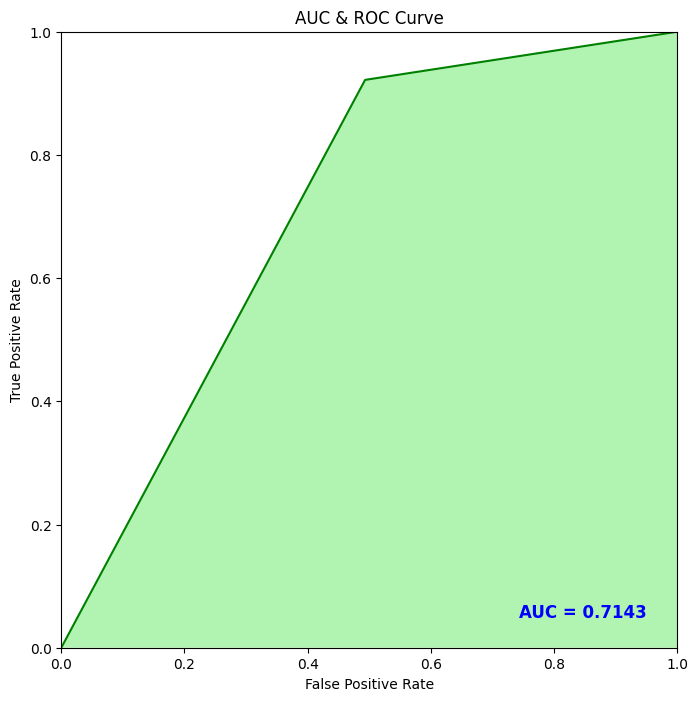

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
x_oos = df_oos.drop('target', axis=1)
y_oos = df_oos['target']

y_oos_pred = log_model.predict(x_oos)

print(classification_report(y_oos, y_oos_pred))
pd.DataFrame(confusion_matrix(y_oos, y_oos_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.48      0.60      1951
           1       0.63      0.89      0.74      1951

    accuracy                           0.68      3902
   macro avg       0.72      0.68      0.67      3902
weighted avg       0.72      0.68      0.67      3902



,0,1
0,939,1012
1,222,1729


In [ ]:
x_total = df21enc.drop('target', axis=1)
label_pred = log_model.predict(x_total)
label_pred_prob = log_model.predict_proba(x_total)[:,1]


In [ ]:
label_pred_prob

array([0.36032378, 0.52234328, 0.45627509, ..., 0.45859138, 0.45859138,
       0.45859138])

In [ ]:
label_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
final = pd.DataFrame({'id':df21enc.index, 'label_pred': label_pred, 'label_pred_prob': label_pred_prob})
final

,id,label_pred,label_pred_prob
0,0,0,0.360324
1,1,1,0.522343
2,2,0,0.456275
3,3,1,0.550951
4,4,0,0.288666
...,...,...,...
4645,4645,0,0.458591
4646,4646,0,0.458591
4647,4647,0,0.458591
4648,4648,0,0.458591


In [ ]:
dff = pd.concat([df2, final], axis=1)

In [ ]:
dff.head(4)

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace,contador_total,dias_proceso,key_autor,key_congresista,nombre,votacion,inicio,fin,grupopartido,bancada,representa,condicion,target,id,label_pred,label_pred_prob
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 13...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/J...,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal...,20,166,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,JOSÉ LEÓN LUNA GÁLVEZ,69996,27-jul-2011,26-jul-2016,Alianza Solidaridad Nacional,SOLIDARIDAD NACIONAL,Lima,en Ejercicio,1,0,0,0.360324
1,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 13...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/J...,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal...,20,166,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,JOSÉ LEÓN LUNA GÁLVEZ,27392,27-jul-2006,26-jul-2011,Unidad Nacional,ALIANZA NACIONAL,Lima,en Ejercicio,1,1,1,0.522343
2,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 13...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/J...,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal...,20,166,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,JOSÉ LEÓN LUNA GÁLVEZ,44398,27-jul-2001,26-jul-2006,Unidad Nacional,ALIANZA ELECTORAL UNIDAD NACIONAL,Lima,Suspendido por Acusación Constitucional,1,2,0,0.456275
3,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 13...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/J...,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal...,20,166,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,JOSÉ LEÓN LUNA GÁLVEZ,20001,27-jul-2000,26-jul-2001,Independiente,INDEPENDIENTE,Perú,en Ejercicio,1,3,1,0.550951


In [ ]:
dff['riesgo'] = np.where((dff['label_pred_prob']>0) & (dff['label_pred_prob']<=0.33), 'bajo', 
                         np.where((dff['label_pred_prob']>0.33) & (dff['label_pred_prob']<=0.66), 'medio', 'alto'))
dff[['riesgo', 'label_pred_prob', 'label_pred', 'target']]

,riesgo,label_pred_prob,label_pred,target
0,medio,0.360324,0,1
1,medio,0.522343,1,1
2,medio,0.456275,0,1
3,medio,0.550951,1,1
4,bajo,0.288666,0,1
...,...,...,...,...
4645,medio,0.458591,0,0
4646,medio,0.458591,0,0
4647,medio,0.458591,0,0
4648,medio,0.458591,0,0


## 09 Integración matrix seguimiento

In [ ]:
import re

dff['key_proy'] = [ re.findall(r'[\d]+[./\d]+', x)[0] for x in dff['titulo']]
dff['key_proy']

0       00003/2021
1       00003/2021
2       00003/2021
3       00003/2021
4       00003/2021
           ...    
4645    04548/2022
4646    04548/2022
4647    04548/2022
4648    04548/2022
4649    04548/2022
Name: key_proy, Length: 4650, dtype: object

In [ ]:
matrix_pf.columns

Index(['matrix FECHA', 'matrix NUMERO', 'matrix PROYECTO / DESCRIPCIÓN',
       'matrix PROPONENTE', 'matrix BANCADA', 'matrix ALERTA',
       'matrix COMISIÓN', 'matrix ESTADO', 'matrix COMENTARIOS',
       'matrix BANCADAS A FAVOR ', 'matrix BANCADAS EN CONTRA ',
       'matrix BANCADAS EN ABSTENCIÓN', 'matrix IMPACTO',
       'matrix JUSTIFICACIÓN DEL IMPACTO', 'matrix AMBIENTE FAVORABLE',
       'matrix GRADO  POPULISTA', 'matrix PROBABILIDAD',
       'matrix OPINION GREMIAL', 'matrix key_proy'],
      dtype='object')

In [ ]:
set(matrix_pf.columns).intersection(dff.columns)

set()

In [ ]:
dff2=pd.merge(dff, matrix_pf, left_on="key_proy", right_on="matrix key_proy", how="left", indicator=True)
dff2.head(2)

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace,contador_total,dias_proceso,key_autor,key_congresista,nombre,votacion,inicio,fin,grupopartido,bancada,representa,condicion,target,id,label_pred,label_pred_prob,key_proy,riesgo,matrix FECHA,matrix NUMERO,matrix PROYECTO / DESCRIPCIÓN,matrix PROPONENTE,matrix BANCADA,matrix ALERTA,matrix COMISIÓN,matrix ESTADO,matrix COMENTARIOS,matrix BANCADAS A FAVOR,matrix BANCADAS EN CONTRA,matrix BANCADAS EN ABSTENCIÓN,matrix IMPACTO,matrix JUSTIFICACIÓN DEL IMPACTO,matrix AMBIENTE FAVORABLE,matrix GRADO POPULISTA,matrix PROBABILIDAD,matrix OPINION GREMIAL,matrix key_proy,_merge
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 13...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/J...,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal...,20,166,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,JOSÉ LEÓN LUNA GÁLVEZ,69996,27-jul-2011,26-jul-2016,Alianza Solidaridad Nacional,SOLIDARIDAD NACIONAL,Lima,en Ejercicio,1,0,0,0.360324,00003/2021,medio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 13...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/J...,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal...,20,166,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,JOSÉ LEÓN LUNA GÁLVEZ,27392,27-jul-2006,26-jul-2011,Unidad Nacional,ALIANZA NACIONAL,Lima,en Ejercicio,1,1,1,0.522343,00003/2021,medio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
dff2._merge.value_counts()

left_only     4564
both            86
right_only       0
Name: _merge, dtype: int64

In [ ]:
dff2 = dff2.replace(np.nan, '')

## 09 Export

In [ ]:
# exportación para ver resultados
lin = 'https://docs.google.com/spreadsheets/d/16vsPetGMBsRQfz-jIYL7JL32euMCYA6O8-qA48L4W8U/edit#gid=0'

In [ ]:
sh2 = gc.open_by_url(lin)
wks1 = sh2[0]
wks1.clear(start='A1', end=None)
wks1.set_dataframe(dff2, 'A1')